<a href="https://colab.research.google.com/github/gokhanozbek/reservoir-characteristics/blob/master/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

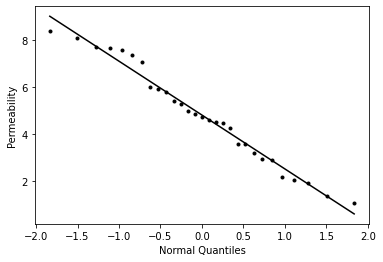

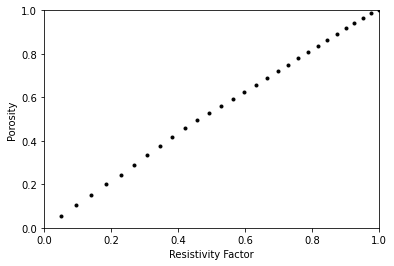

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def lorenz(porosity, resistivityF):
    sortedporosity = np.sort(porosity)
    sortedporosity = np.flip(sortedporosity)
    sortedresistivityF = np.sort(resistivityF)
    sortedresistivityF = np.flip(sortedresistivityF)
    logresistivityF = np.log(sortedresistivityF)
    lresistivityF=np.cumsum(logresistivityF)/np.sum(logresistivityF)
    Pporosity=np.cumsum(sortedporosity)/np.sum(sortedporosity)
    plt.plot(lresistivityF,Pporosity,'k.')
    plt.xlabel("Resistivity Factor")
    plt.ylabel("Porosity")
    
    
    plt.xlim([0,1])
    plt.ylim([0,1])
    area= np.trapz(Pporosity, lresistivityF)
    coefficient = (area-0.5)/0.5

    return coefficient
def dkystraP(permeability):
    sortedpermeability = np.sort(permeability)
    sortedpermeability = np.flip(sortedpermeability)


    numdata = permeability.shape[0]
    #print(permeability.shape[0])
    probs = 1/(numdata+1)
    xaxis = np.linspace(1,numdata,numdata)
    xaxis= xaxis*probs
    xaxis = norm.ppf(xaxis)

    yaxis= np.log(sortedpermeability)
    yaxis2= np.log10(sortedpermeability)

    plt.plot(xaxis,yaxis, 'k.')
    

    m,c= np.polyfit(xaxis,yaxis,1)
    ybestfit = m*xaxis+c
    plt.xlabel("Normal Quantiles")
    plt.ylabel("Permeability")
    plt.plot(xaxis,ybestfit,'k')
    plt.show()

    k50p0 = np.exp(m*norm.ppf(0.5)+c)
    k84p1 = np.exp(m*norm.ppf(0.841)+c)
    V = (k50p0-k84p1)/k50p0
    return V
    

data = np.loadtxt("HW.txt")



porosity = data[:,2]
permeability = data[:,1]
resistivityF=data[:,0]



DC=dkystraP(permeability)

LC=lorenz(resistivityF,porosity)
